In [280]:
import requests
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Data Collecting / Cleaning

In [244]:
# I worked with a ready-made dataset in this project
def collecting_data():
    url_csv = "vivino_top_ten.csv"
    data = pd.read_csv(url_csv)
    return data

df = collecting_data()

In [245]:
# Cleaning columns of dataset
def cleaning_data(dataset):
    dataset['Year'] = dataset['Year'].replace('N.V.', np.NAN)
    dataset['Year'] = pd.to_numeric(dataset['Year'], errors='coerce')
    dataset.drop('Wine_ID', axis=1, inplace=True)
    dataset.drop('Country_Code', axis=1, inplace=True)
    return dataset

df = cleaning_data(df)

In [246]:
df.head(30)

,Winery,Year,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style
0,Baron de Ley,2020.0,Rosado de Lágrima 2020,4.2,42,7.15,La Rioja,Malbec,False,Argentina,Rose
1,New Age,NaN,Sweet White N.V.,3.9,5672,7.43,Mendoza,Malbec,False,Argentina,White
2,Alamos,2018.0,Malbec Rosé 2018,3.9,384,8.00,Valle de Uco,Malbec,False,Argentina,Rose
3,Alamos,2019.0,Torrontes 2019,3.8,820,8.00,Salta,Malbec,False,Argentina,White
4,Alamos,2020.0,Cabernet Sauvignon 2020,3.6,489,8.00,Mendoza,Malbec,False,Argentina,Red
5,Alamos,2020.0,Chardonnay 2020,3.7,851,8.00,Mendoza,Malbec,False,Argentina,White
6,Alamos,2020.0,Malbec 2020,3.8,3153,8.00,Mendoza,Malbec,False,Argentina,Red
7,Amalaya,2020.0,Blanco (Torrontés - Riesling) 2020,3.8,501,8.50,Salta,Malbec,False,Argentina,White
8,Alamos,2019.0,Bonarda 2019,3.8,1147,8.54,Mendoza,Malbec,False,Argentina,Red
9,Bodega Piedra Negra,2019.0,Alta Colección Pinot Gris 2019,3.6,149,8.90,Valle de Uco,Malbec,False,Argentina,White


In [247]:
df.isnull().sum()

Winery             0
Year             907
Wine               0
Rating             0
Reviews            0
Price              0
Region             0
Primary_Grape      0
Natural            0
Country            0
Style              0
dtype: int64

Data Exploration

In [287]:
# Let's get some information about the dataset
def summarize_dataset(dataset):
    print("Dataset dimension: ", dataset.shape)
    print('\nFirst 5 rows of dataset: '), print(dataset.head(5))
    print('\nInformation about the dataset columns: \n'), print(dataset.info())
    print(f"\nDescribe dataset \n {dataset.describe()}")

summarize_dataset(df)

Dataset dimension:  (12205, 13)

First 5 rows of dataset: 
         Winery    Year                     Wine  Rating  Reviews  Price  \
0  Baron de Ley  2020.0   Rosado de Lágrima 2020     4.2       42   7.15   
1       New Age  2016.0         Sweet White N.V.     3.9     5672   7.43   
2        Alamos  2018.0         Malbec Rosé 2018     3.9      384   8.00   
3        Alamos  2019.0           Torrontes 2019     3.8      820   8.00   
4        Alamos  2020.0  Cabernet Sauvignon 2020     3.6      489   8.00   

         Region Primary_Grape  Natural    Country  Style  Style_num  \
0      La Rioja        Malbec    False  Argentina   Rose          3   
1       Mendoza        Malbec    False  Argentina  White          5   
2  Valle de Uco        Malbec    False  Argentina   Rose          3   
3         Salta        Malbec    False  Argentina  White          5   
4       Mendoza        Malbec    False  Argentina    Red          2   

   Natural_num  
0            1  
1            1  
2     

In [250]:
def data_encoding_test(df):
    # df = pd.concat([df, pd.get_dummies(df['Style'])] , axis=1).drop("Style", axis=1)
    le = LabelEncoder()
    df['Style_num'] = le.fit_transform(df['Style'])
    df['Natural_num'] = df.Natural.map(lambda x : 0 if x == True else 1)
    mean_year = round(df.Year.mean())
    df.Year = df.Year.fillna(mean_year)
    return df
df = data_encoding_test(df)

Data Visualization

In [251]:
df

,Winery,Year,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Style_num,Natural_num
0,Baron de Ley,2020.0,Rosado de Lágrima 2020,4.2,42,7.150000,La Rioja,Malbec,False,Argentina,Rose,3,1
1,New Age,2016.0,Sweet White N.V.,3.9,5672,7.430000,Mendoza,Malbec,False,Argentina,White,5,1
2,Alamos,2018.0,Malbec Rosé 2018,3.9,384,8.000000,Valle de Uco,Malbec,False,Argentina,Rose,3,1
3,Alamos,2019.0,Torrontes 2019,3.8,820,8.000000,Salta,Malbec,False,Argentina,White,5,1
4,Alamos,2020.0,Cabernet Sauvignon 2020,3.6,489,8.000000,Mendoza,Malbec,False,Argentina,Red,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,Glenelly,2017.0,The Glass Collection Syrah 2017,3.6,199,10.890000,Stellenbosch,Cabernet Sauvignon,False,South Africa,Red,2,1
12201,Lourensford,2019.0,The River Garden Sauvignon Blanc 2019,3.4,107,7.900000,Western Cape,Cabernet Sauvignon,False,South Africa,White,5,1
12202,Springfield Estate,2021.0,Life from Stone Sauvignon Blanc 2021,4.3,323,12.800000,Robertson,Cabernet Sauvignon,False,South Africa,White,5,1
12203,Meerlust,2017.0,Cabernet Sauvignon 2017,4.1,178,22.900000,Stellenbosch,Cabernet Sauvignon,False,South Africa,Red,2,1


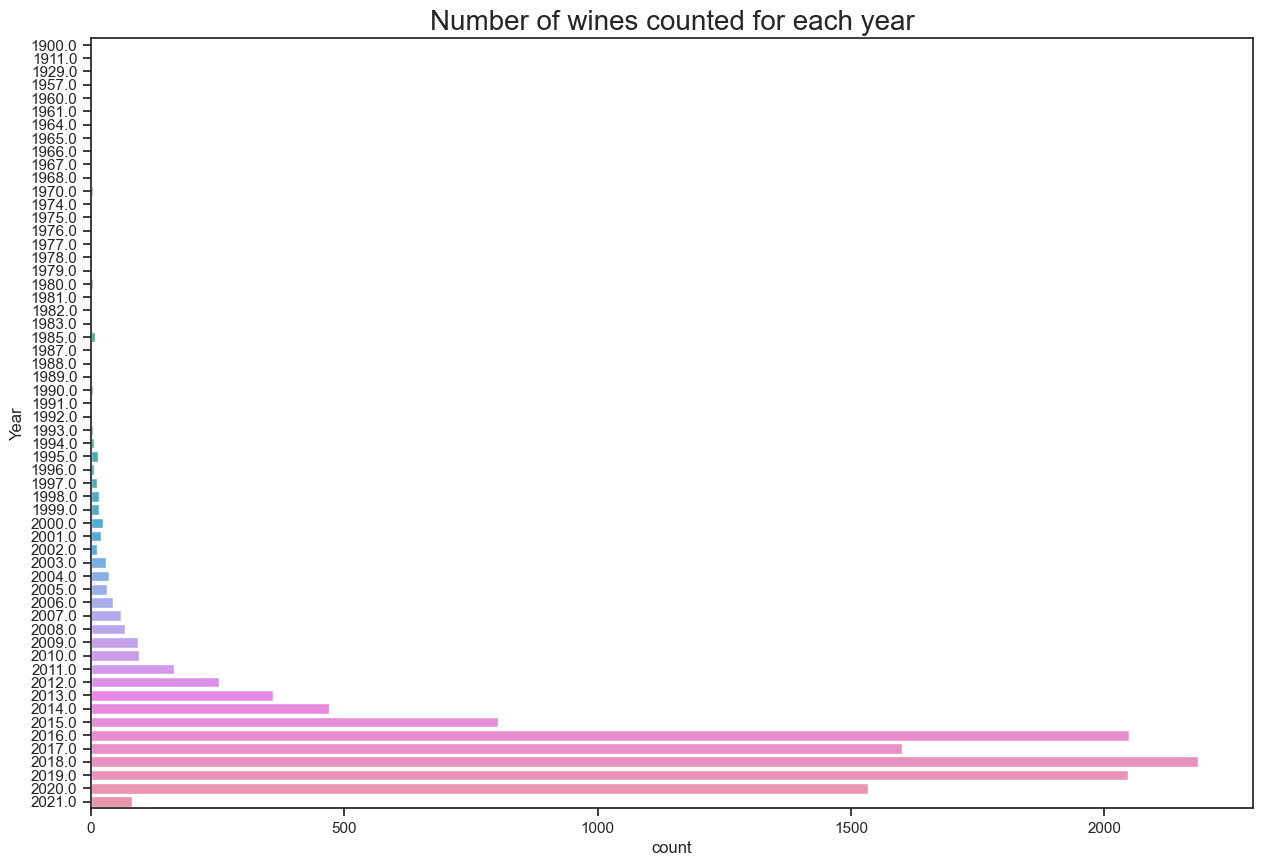

In [252]:
# Plot bar with dataset regions
def count_regions(dataset):
    plt.figure(figsize=(15, 10))
    plt.title('Number of wines counted for each year', fontsize = 20)
    sns.countplot(data=dataset, y="Year")

count_regions(df)

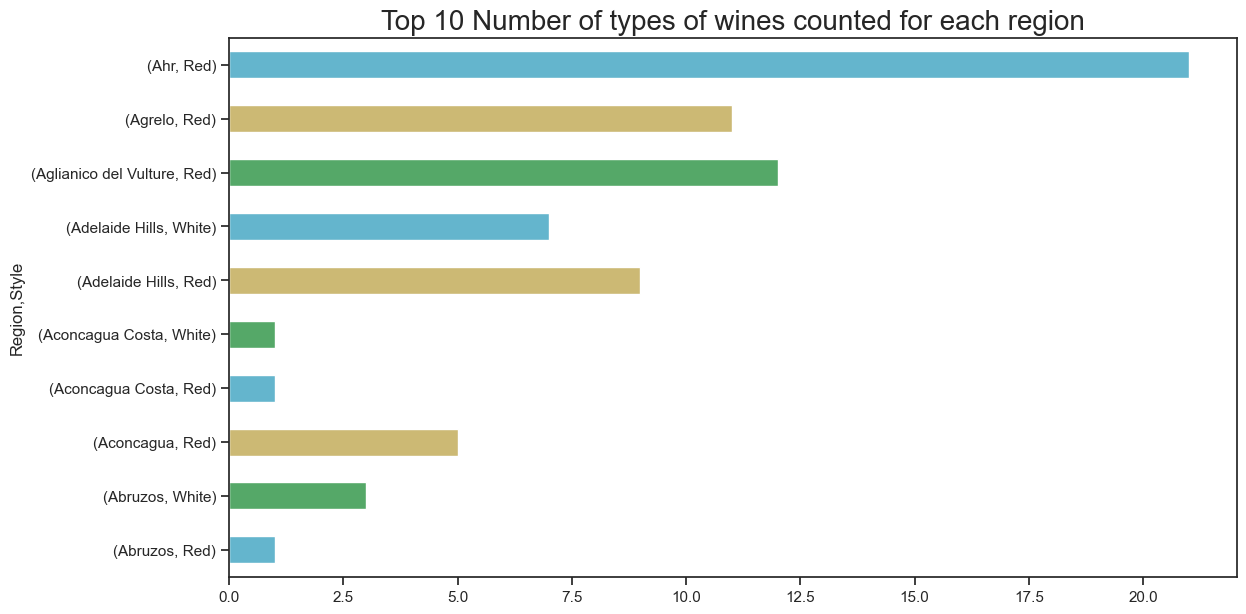

In [253]:
# Plot bar with dataset region
def wine_each_region(dataset):
    plt.figure(figsize=(13, 7))
    plt.title('Top 10 Number of types of wines counted for each region', fontsize = 20)
    plt.xlabel('Count')
    region = dataset.groupby(['Region','Style'])['Wine'].count().head(10)
    region.plot(kind='barh', color=['c', 'g', 'y'])

wine_each_region(df)

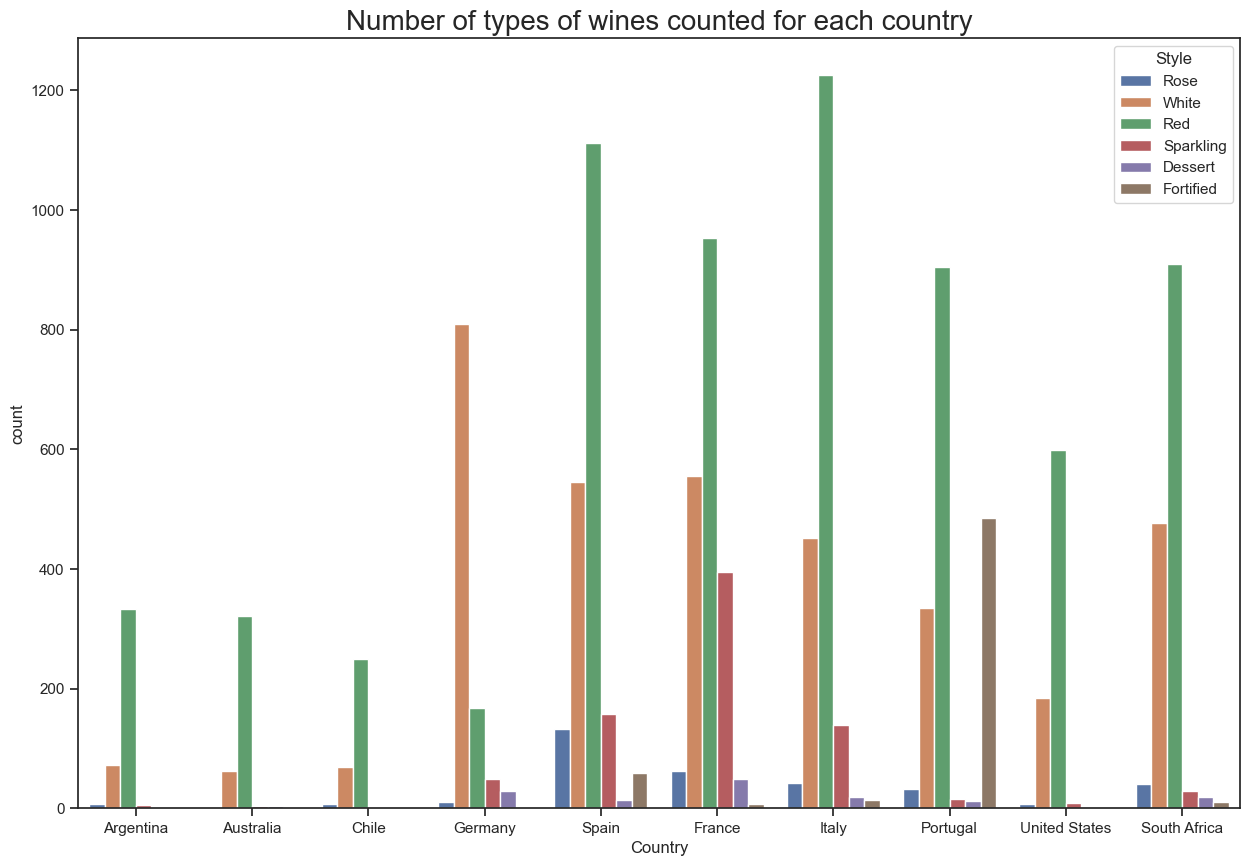

In [254]:
# Plot bar with dataset country
def wine_each_country(dataset):
    plt.figure(figsize=(15, 10))
    plt.title('Number of types of wines counted for each country', fontsize = 20)
    sns.countplot(data=dataset, x='Country', hue='Style')

wine_each_country(df)

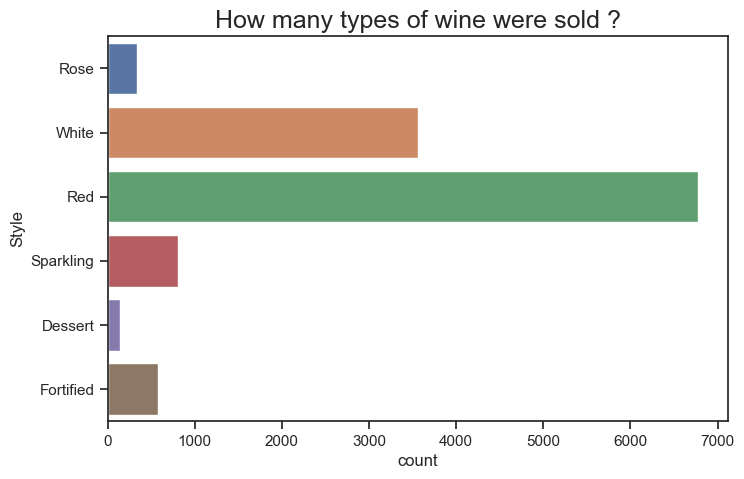

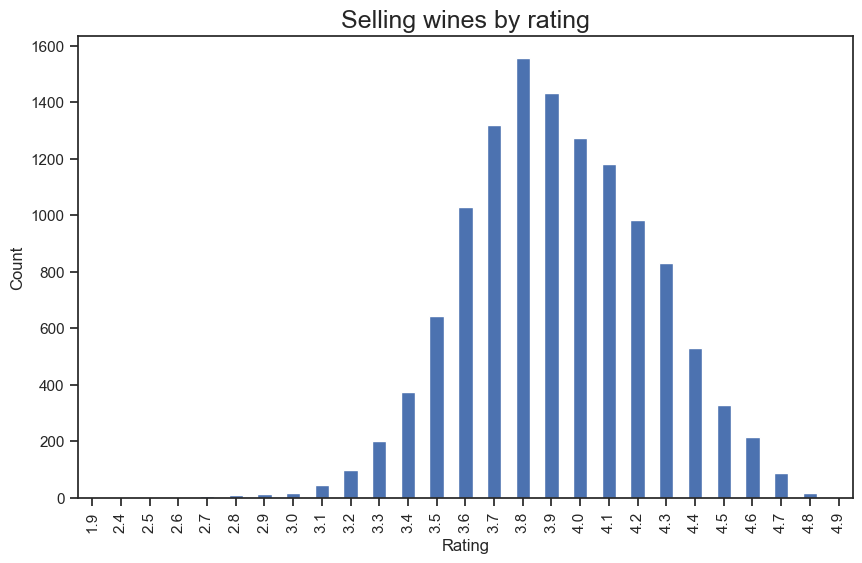

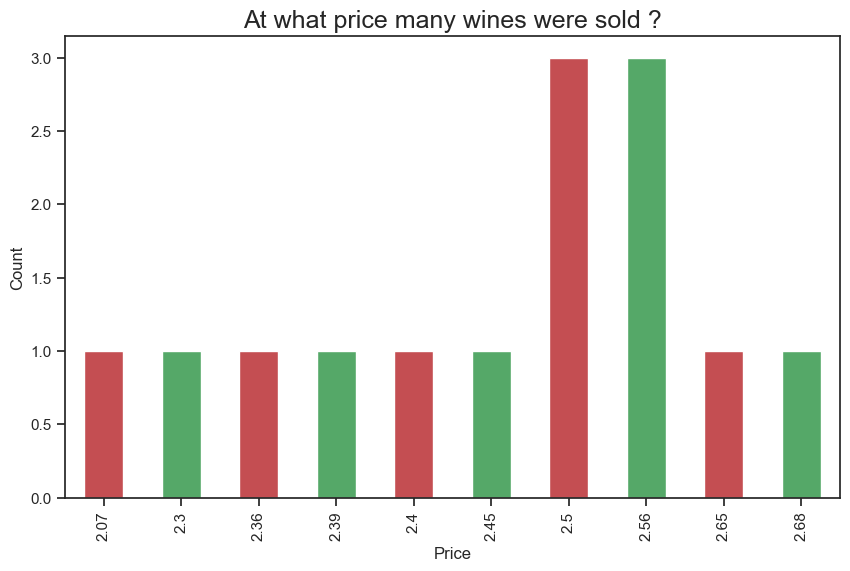

In [255]:
def top_salled_wines(dataset):
    plt.figure(figsize=(8, 5))
    plt.title('How many types of wine were sold ?', fontsize=18)
    sns.countplot(y="Style", data=dataset);

    plt.figure(figsize=(10, 6))
    plt.title('Selling wines by rating',fontsize=18)
    plt.ylabel('Count')
    dd = dataset.groupby(['Rating'])['Wine'].count()
    dd.plot(kind='bar')

    plt.figure(figsize=(10, 6))
    plt.ylabel('Count')
    plt.title('At what price many wines were sold ?', fontsize=18)
    top = dataset.groupby(['Price'])['Wine'].count().head(10)
    top.plot(kind='bar', color=['r', 'g'])

top_salled_wines(df)

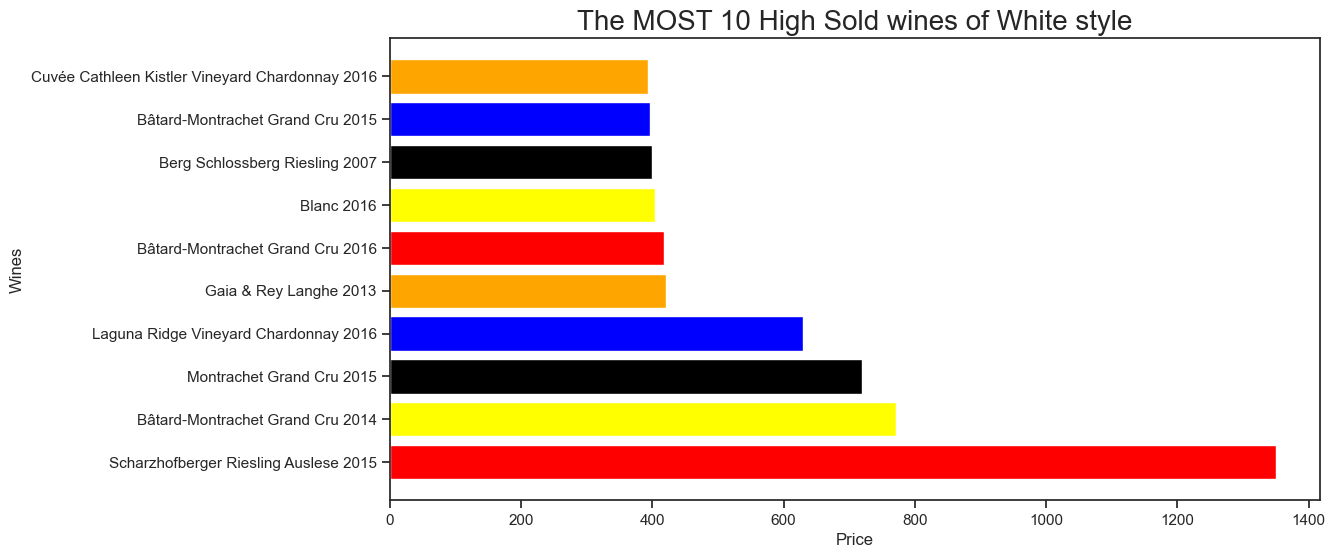

In [256]:
def top_wine(dataset, style):
    c = ['red', 'yellow', 'black', 'blue', 'orange']
    most_reviews = dict(dataset.loc[(dataset['Style'] == style), ['Wine', 'Price']].nlargest(10, 'Price').values)
    vivi, price = list(most_reviews.keys()), list(most_reviews.values())
    fig = plt.figure(figsize = (12, 6))
    plt.barh(vivi,price, color=c)
    plt.title(f'The MOST 10 High Sold wines of {style} style', fontsize = 20)
    plt.ylabel('Wines')
    plt.xlabel('Price')
    plt.show()

top_wine(df,'White')

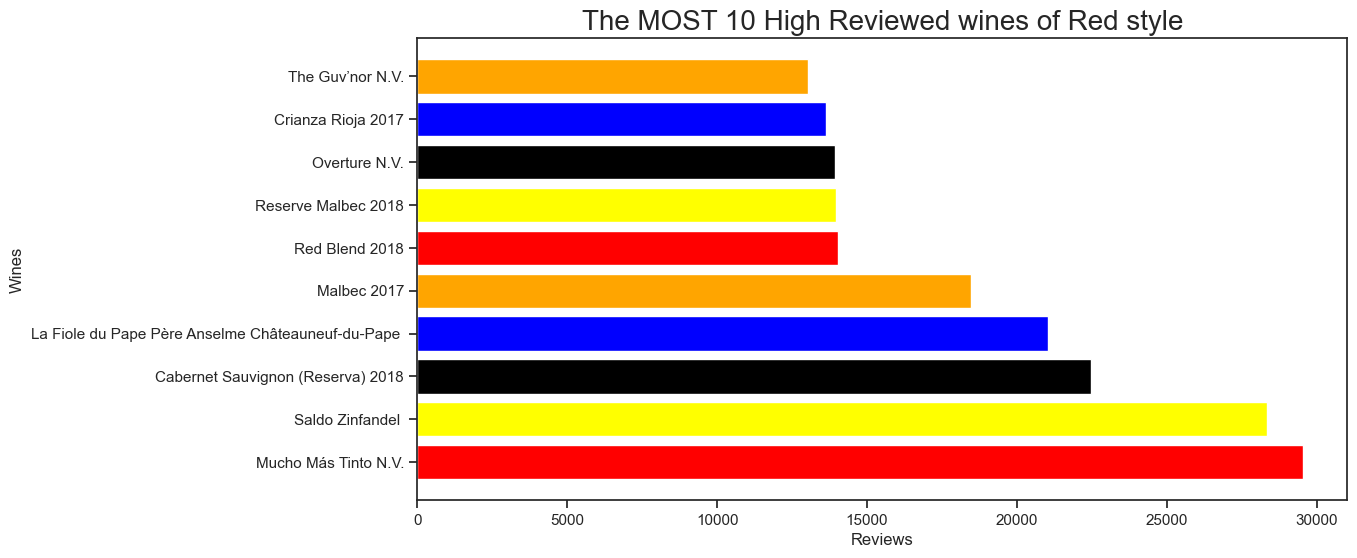

In [257]:
def wine_reviews(dataset, style):
    c = ['red', 'yellow', 'black', 'blue', 'orange']
    most_reviews = dict(dataset.loc[(dataset['Style'] == style), ['Wine', 'Reviews']].nlargest(10, 'Reviews').values)
    vivi, review= list(most_reviews.keys()), list(most_reviews.values())
    fig = plt.figure(figsize = (12, 6))
    plt.barh(vivi,review, color=c)
    plt.title(f'The MOST 10 High Reviewed wines of {style} style', fontsize = 20)
    plt.ylabel('Wines')
    plt.xlabel('Reviews')
    plt.show()

wine_reviews(df,'Red')

/var/folders/6t/jkbns73x12zdygmd7h9dt_4m0000gp/T/ipykernel_2317/357420112.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coor = dataset.corr()


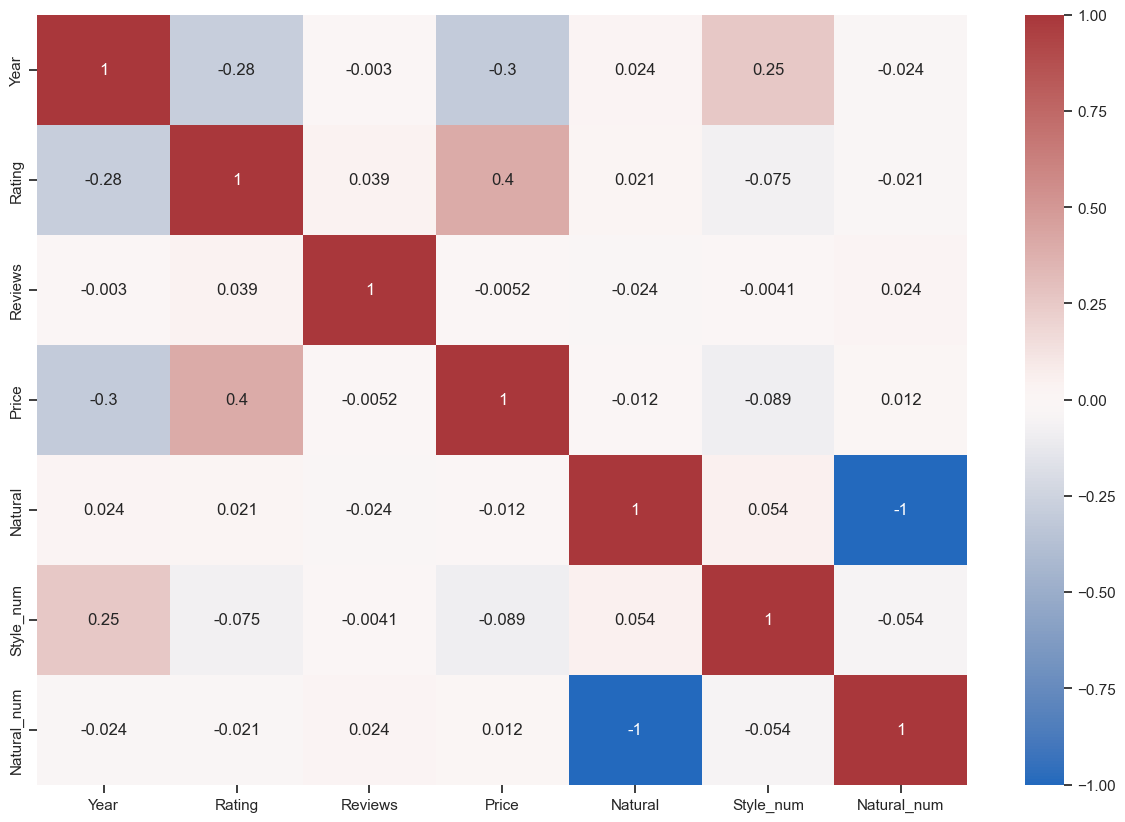

In [258]:
# Correlations Matrix
def compute_correlations_matrix(dataset):
    coor = dataset.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(coor, annot=True, cmap='vlag')
    plt.show()
compute_correlations_matrix(df)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


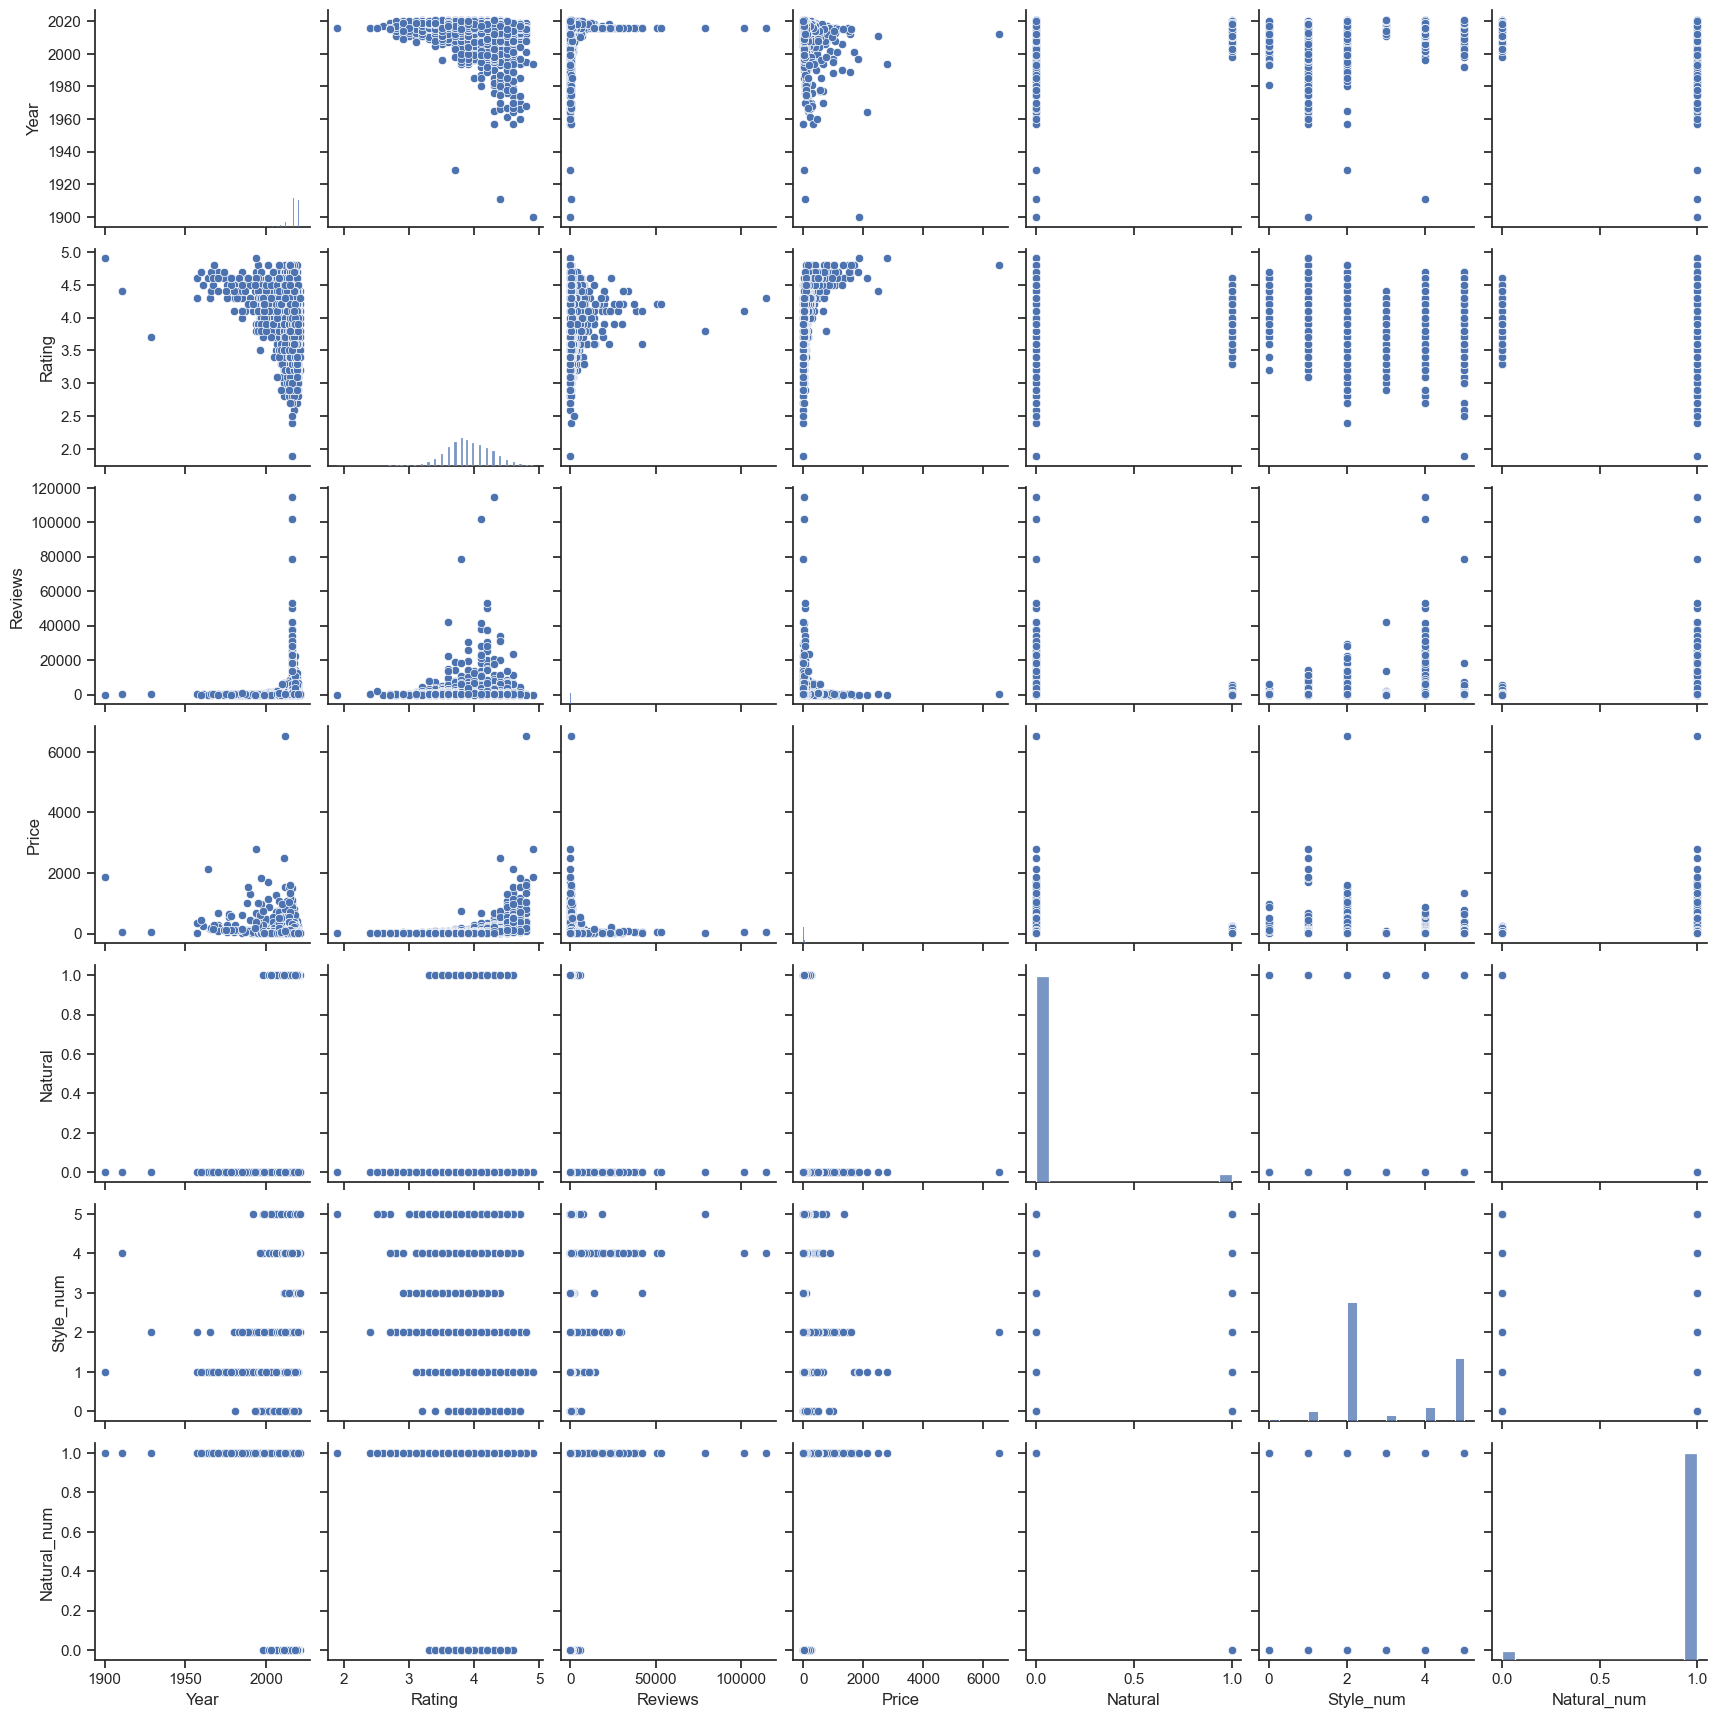

In [259]:
# Scatterplot Matrix
def print_scatter_matrix(dataset):
    # plt.figure(figsize=(20, 10))
    sns.set_theme(style='ticks')
    sns.pairplot(dataset)
    plt.show()

print_scatter_matrix(df)

ML section

In [286]:
x, y = df[['Rating', 'Year']], df.Price

def ML_Model_1(x, y): # I used the GradientBoostingRegressor model because it is the best model for the data I have
    X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.2, random_state=33) # In this I divided the Data into 4 types

    """
    Gradient Boosting for regression.
    This estimator builds an additive model in a forward stage-wise fashion;
    it allows for the optimization of arbitrary differentiable loss functions.
    In each stage a regression tree is fit on the negative gradient of the given loss function.
    """
    model = GradientBoostingRegressor()
    model.fit(X_train, Y_train)

    predict = model.predict(X_validation)

    print('Mean Absolute Error:', round(np.sqrt(mean_absolute_error(Y_validation, predict)), 2)) # I used mean_absolute_error in the estimation

ML_Model_1(x, y)

Mean Absolute Error: 4.7


In [285]:
def ML_nodel_2(x, y): # I used the SVR model because it is the best model for the data I have
    X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.2, random_state=33) # In this I divided the Data into 4 types

    """
     Linear regression analysis is used to predict the value
     of a variable based on the value of another variable.
     The variable you want to predict is called the dependent variable.
     The variable you are using to predict the other variable's value is called the independent variable.
    """
    model_SVR = LinearRegression()

    model_SVR.fit(X_train, Y_train)
    predict_SVR = model_SVR.predict(X_validation)

    print('Mean Absolute Error:', round(np.sqrt(mean_absolute_error(Y_validation, predict_SVR)), 2))  # I used mean_absolute_error in the estimation

ML_nodel_2(x, y)

Mean Absolute Error: 5.89
